# practice making shaped noise

In [8]:
import numpy as np
import scipy as sp
from scipy.signal import iirfilter
import matplotlib.pyplot as plt

In [2]:
n_trial = 100
n_time = 100
srate = 100
n_ch = 42
def plot_ch(data,sep_scale=2):
    time = np.arange(n_time)/srate
    plt.plot(time,data+sep_scale*np.arange(n_ch))

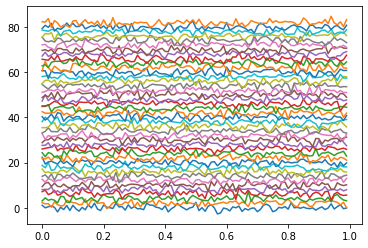

In [3]:
noise = np.random.randn(n_trial, n_time, n_ch)
plot_ch(noise[0,])

In [46]:
# let's try to make band-limited noise
f_band = [20,45]
w_filt = np.array(f_band)/(srate/2)
b_filt, a_filt = iirfilter(10,w_filt)
# f_z, h_z = sp.signal.freqz(b_filt,a_filt,fs=srate)
noise_filtered = sp.stats.zscore(sp.signal.filtfilt(b_filt,a_filt,noise,axis=1),axis=1)

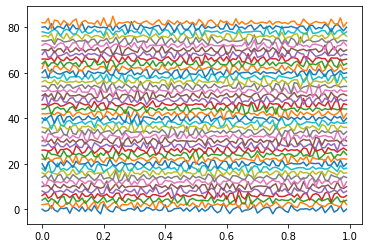

In [47]:
plot_ch(noise_filtered[0,])

C:\Users\mickey\miniconda3\envs\ecog_is2s\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


(0.0, 30.0)

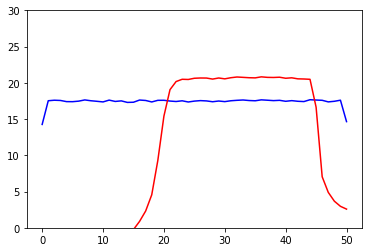

In [48]:
# let's look at the filter response, the white noise spectra and the filtered data spectra.
f_hat = np.fft.rfftfreq(n_time,d=1/srate)
noise_hat = np.fft.rfft(noise,axis=1)
noise_filtered_hat = np.fft.rfft(noise_filtered,axis=1)
plt.plot(f_hat,20*np.log10(np.abs(noise_hat)).mean(axis=(0,2)),color='b')
plt.plot(f_hat,20*np.log10(np.abs(noise_filtered_hat)).mean(axis=(0,2)),color='r')
# plt.plot(f_z,20*np.log10(np.abs(h_z)),color='k',linestyle=':')
plt.ylim(0,30)

In [ ]:
# resulting function
def generate_bl_noise(freq_band,n_trial=100,n_time=100,n_ch=42,srate=100,n_iir=10,zscore=True):
    noise = np.random.randn(n_trial, n_time, n_ch)
    w_filt = np.array(f_band)/(srate/2)
    b_filt, a_filt = iirfilter(10,w_filt)
    noise_filtered = sp.stats.zscore(sp.signal.filtfilt(b_filt,a_filt,noise,axis=1),axis=1)
    return noise_filtered